In [ ]:
!pip install webcolors


In [1]:
# Required imports
import cv2 as cv2
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import pandas as pd
import webcolors

In [2]:
# List of images to process
images = [
    "Pigs.jpg",
    "Race_Horse.jpeg",
    "Randy_Moss.jpeg",
    "Team_USA.jpeg",
    "Bayern.jpeg",
    "Byron_Buxton.jpeg"
]

In [3]:
# Function to extract dominant colors
def extract_dominant_colors(image_path, num_colors=3):
    image = cv2.imread(image_path)  # Read the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = image.reshape((-1, 3))  # Reshape to a 2D array of pixels (N x 3)

    # Apply K-Means clustering to find dominant colors
    kmeans = KMeans(n_clusters=num_colors, random_state=42)
    kmeans.fit(image)
    colors = kmeans.cluster_centers_.astype(int)  # RGB colors
    counts = Counter(kmeans.labels_)

    # Sort colors by frequency
    sorted_colors = sorted(zip(counts.values(), colors), reverse=True)
    dominant_colors = [color.tolist() for count, color in sorted_colors]
    return dominant_colors



# Process images to extract dominant colors
color_results = []
for img_name in images:
    dominant_colors = extract_dominant_colors(img_name)
    color_results.append({
        "Image": img_name,
        "Dominant Colors": dominant_colors
    })

# Create a DataFrame for dominant colors
color_df = pd.DataFrame(color_results)
print(color_df)

# Save the results to a CSV file
color_df.to_csv("dominant_colors_results.csv", index=False)

               Image                                  Dominant Colors
0           Pigs.jpg  [[138, 114, 92], [207, 198, 191], [70, 51, 36]]
1    Race_Horse.jpeg   [[92, 106, 66], [141, 153, 170], [36, 29, 21]]
2    Randy_Moss.jpeg  [[135, 126, 72], [200, 195, 179], [33, 28, 24]]
3      Team_USA.jpeg   [[29, 20, 18], [211, 88, 39], [211, 184, 174]]
4        Bayern.jpeg    [[152, 20, 15], [120, 151, 78], [41, 39, 31]]
5  Byron_Buxton.jpeg  [[148, 98, 90], [99, 127, 89], [193, 191, 201]]


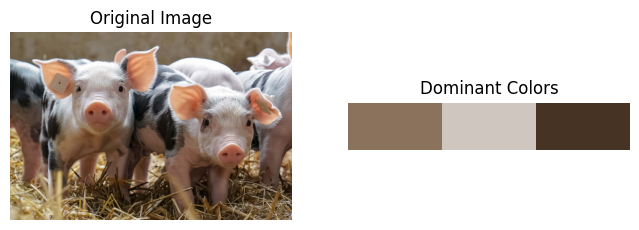

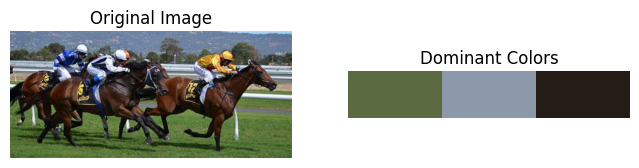

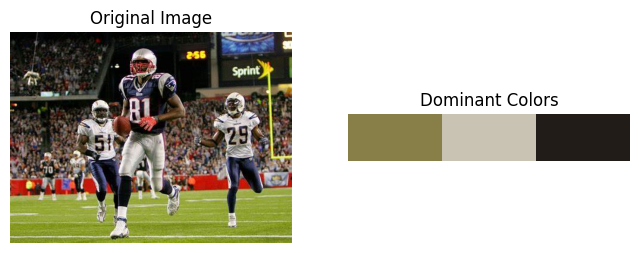

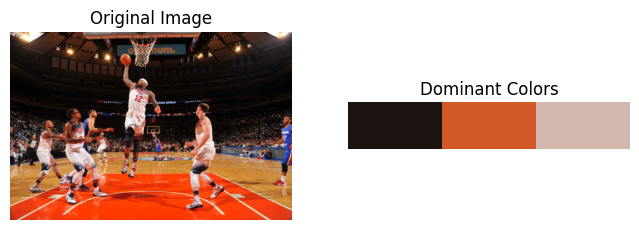

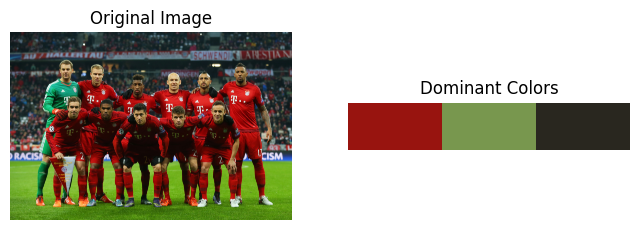

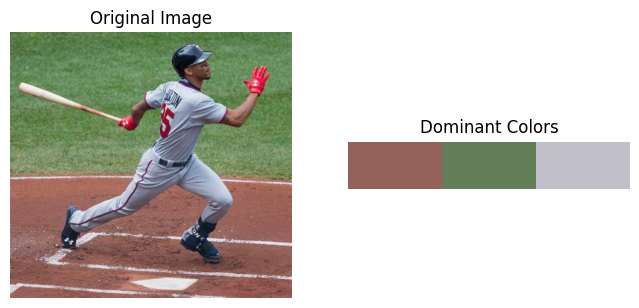

In [4]:
import cv2
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the image with dominant colors
def visualize_dominant_colors(image_path, dominant_colors):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the original image
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Original Image")

    # Create a color palette for dominant colors
    palette = np.zeros((50, 300, 3), dtype=np.uint8)
    step = 300 // len(dominant_colors)
    for i, color in enumerate(dominant_colors):
        palette[:, i * step:(i + 1) * step] = color

    # Plot the color palette
    plt.subplot(1, 2, 2)
    plt.imshow(palette)
    plt.axis('off')
    plt.title("Dominant Colors")

    plt.show()

# Process images and display results
for result in color_results:
    image_path = result["Image"]
    dominant_colors = result["Dominant Colors"]
    visualize_dominant_colors(image_path, dominant_colors)
